In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/ks-projects-201801.csv', parse_dates=['deadline', 'launched'])

In [3]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
# remove duplicate columns and keep columns that are converted to US currency for consistency

df = df.drop(['ID', 'pledged', 'usd pledged', 'goal'], axis =1)

In [5]:
df.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              378657 non-null  object        
 1   category          378661 non-null  object        
 2   main_category     378661 non-null  object        
 3   currency          378661 non-null  object        
 4   deadline          378661 non-null  datetime64[ns]
 5   launched          378661 non-null  datetime64[ns]
 6   state             378661 non-null  object        
 7   backers           378661 non-null  int64         
 8   country           378661 non-null  object        
 9   usd_pledged_real  378661 non-null  float64       
 10  usd_goal_real     378661 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 31.8+ MB


In [7]:
df.isna().sum()

name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
states = df.state.value_counts(); states

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

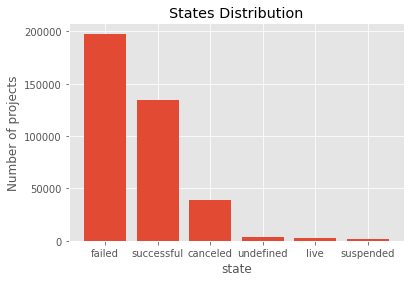

In [10]:
plt.bar(x = states.index, height = states.values)
plt.title('States Distribution')
plt.ylabel('Number of projects')
plt.xlabel('state')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [11]:
#drop live state, suspended, undefined projects
#suspended project broke kickstarter rules, undefined projects possibly not yet launched or missing data

df = df[df.state != 'live']
df = df[df.state != 'suspended']
df = df[df.state != 'undefined']

In [12]:
df.state.value_counts()

failed        197716
successful    133956
canceled       38779
Name: state, dtype: int64

In [13]:
# sucessful labeled as 1, failed and canceled labeled as 0

df['state'] = (df['state'] == 'successful')*1

In [14]:
counts = df.state.value_counts()
counts

0    236495
1    133956
Name: state, dtype: int64

In [15]:
state_proportion = counts/counts.sum()
state_proportion

0    0.638398
1    0.361602
Name: state, dtype: float64

In [16]:
df.deadline.min()

Timestamp('2009-05-03 00:00:00')

In [17]:
df.deadline.max()

Timestamp('2018-02-24 00:00:00')

In [18]:
df.launched.min()

Timestamp('1970-01-01 01:00:00')

In [19]:
df.launched.max()

Timestamp('2018-01-02 03:05:10')

In [20]:
df.launched.idxmax()

15604

In [21]:
df.iloc[15604]

name                Apartment B- A short psychological thriller
category                                                 Shorts
main_category                                      Film & Video
currency                                                    USD
deadline                                    2014-04-26 00:00:00
launched                                    2014-03-27 13:50:58
state                                                         0
backers                                                       6
country                                                      US
usd_pledged_real                                            125
usd_goal_real                                              1000
Name: 15959, dtype: object

In [22]:
df['launched'].groupby(df.launched.dt.year).count()

launched
1970        6
2009     1329
2010    10503
2011    26192
2012    41109
2013    44791
2014    66724
2015    74199
2016    56411
2017    49185
2018        2
Name: launched, dtype: int64

In [23]:
# drop lauch year 1970 due to launch date error

df = df[df.launched.dt.year != 1970]

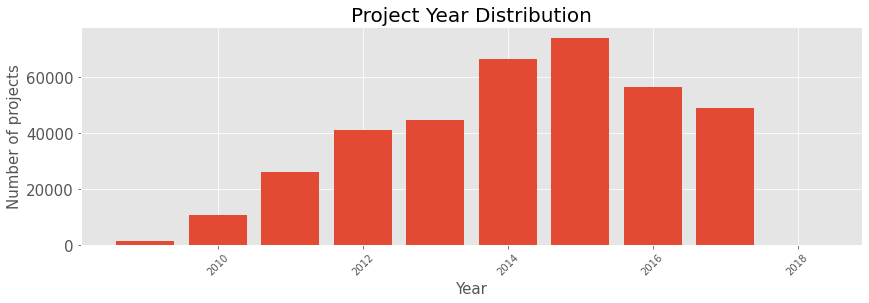

In [24]:
years = df['launched'].groupby(df.launched.dt.year).count()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = years.index, height = years.values)
plt.title('Project Year Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [25]:
df['launched'].groupby(df.launched.dt.year).count()

launched
2009     1329
2010    10503
2011    26192
2012    41109
2013    44791
2014    66724
2015    74199
2016    56411
2017    49185
2018        2
Name: launched, dtype: int64

In [26]:
category = df['category'].value_counts(); category

Product Design     21887
Documentary        16065
Tabletop Games     14038
Music              13360
Shorts             12303
                   ...  
Residencies           69
Letterpress           47
Chiptune              35
Literary Spaces       23
Taxidermy             11
Name: category, Length: 159, dtype: int64

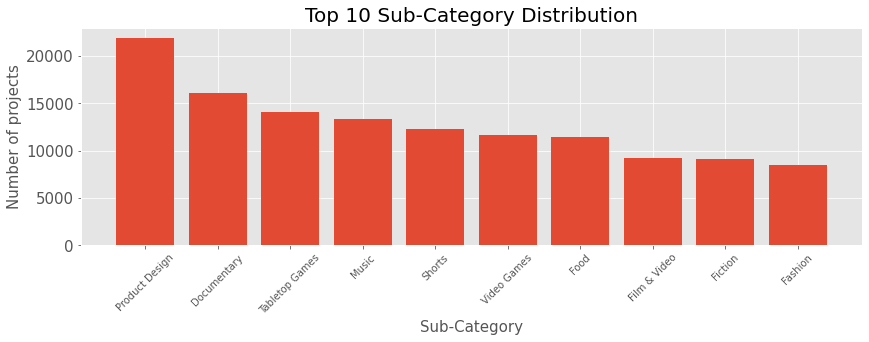

In [27]:
fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = category.index[:10], height = category.values[:10])
plt.title('Top 10 Sub-Category Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Sub-Category')
plt.xticks(rotation =45)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [28]:
main_category = df['main_category'].value_counts();  main_category

Film & Video    62279
Music           49253
Publishing      39047
Games           34722
Technology      31765
Design          29515
Art             27861
Food            24265
Fashion         22425
Theater         10849
Comics          10720
Photography     10675
Crafts           8661
Journalism       4672
Dance            3736
Name: main_category, dtype: int64

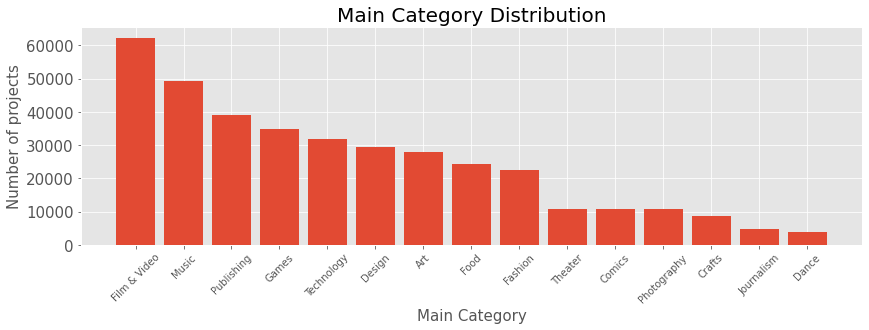

In [29]:
fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = main_category.index, height = main_category.values)
plt.title('Main Category Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Main Category')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

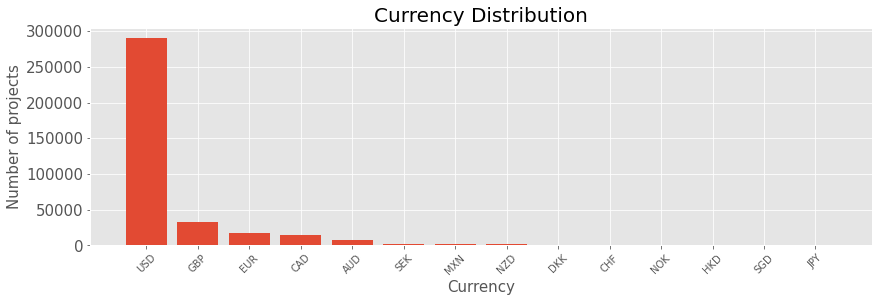

In [30]:
currency = df['currency'].value_counts()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = currency.index, height = currency.values)
plt.title('Currency Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Currency')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

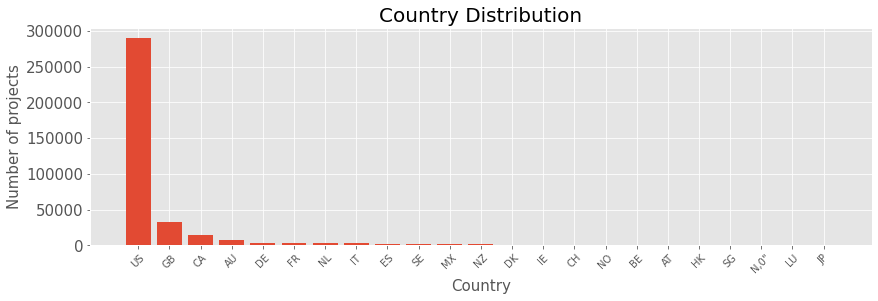

In [31]:
# similar distribution to currency so omit this column

country = df['country'].value_counts()

fig, ax = plt.subplots(1, figsize = (14, 4))

ax.bar(x = country.index, height = country.values)
plt.title('Country Distribution')
plt.ylabel('Number of projects')
plt.xlabel('Country')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation =45)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize = 15)

In [32]:
df.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,14,US,1283.0,19500.00


In [33]:
# remove hour/minutes/seconds from dataframe and convert year/month/day into individual features

# df['launched'] = df.launched.dt.date  #gives date without hours/minutes/seconds
df['year'] = df.launched.dt.year
df['month'] = df.launched.dt.month
df['day'] = df.launched.dt.day

In [34]:
# add a column for total active days
df['active_days'] = df['deadline'] - df['launched']
df['active_days'] = df.active_days.dt.components['days']

In [35]:
# compare properties of sucesses and failures
successes = df[df['state']==1].groupby('main_category')[['backers', 'usd_pledged_real', 'usd_goal_real', 'active_days']].mean()
failures = df[df['state']==0].groupby('main_category')[['backers', 'usd_pledged_real', 'usd_goal_real', 'active_days']].mean()


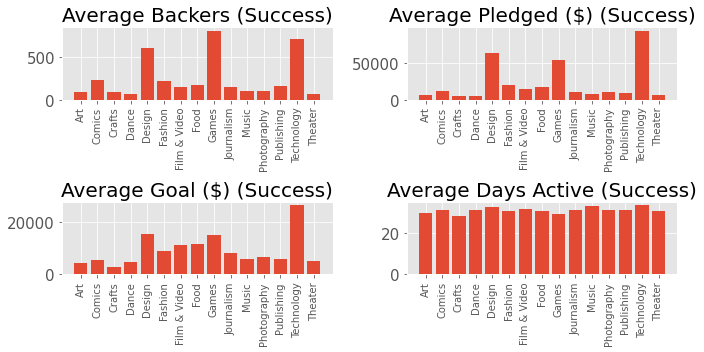

In [36]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))

ax[0,0].bar(x = successes.index, height = successes.backers)
ax[0,1].bar(x = successes.index, height = successes.usd_pledged_real)
ax[1,0].bar(x = successes.index, height = successes.usd_goal_real)
ax[1,1].bar(x = successes.index, height = successes.active_days)

ax[0,0].set_title('Average Backers (Success)')
ax[0,1].set_title('Average Pledged ($) (Success)')
ax[1,0].set_title('Average Goal ($) (Success)')
ax[1,1].set_title('Average Days Active (Success)')

ax[0,0].set_xticklabels(successes.index, rotation=90)
ax[0,1].set_xticklabels(successes.index, rotation=90)
ax[1,0].set_xticklabels(successes.index, rotation=90)
ax[1,1].set_xticklabels(successes.index, rotation=90)
fig.tight_layout()

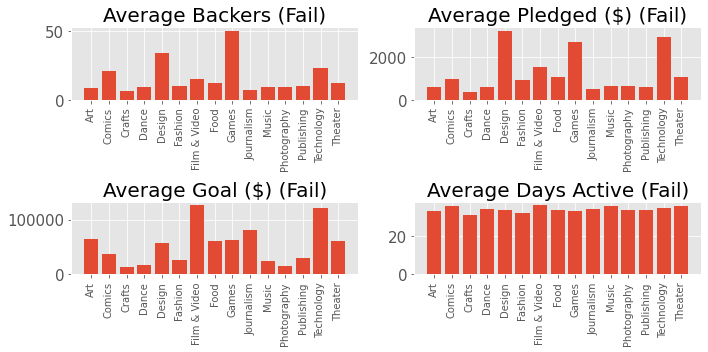

In [37]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))

ax[0,0].bar(x = failures.index, height = failures.backers)
ax[0,1].bar(x = failures.index, height = failures.usd_pledged_real)
ax[1,0].bar(x = failures.index, height = failures.usd_goal_real)
ax[1,1].bar(x = failures.index, height = failures.active_days)

ax[0,0].set_title('Average Backers (Fail)')
ax[0,1].set_title('Average Pledged ($) (Fail)')
ax[1,0].set_title('Average Goal ($) (Fail)')
ax[1,1].set_title('Average Days Active (Fail)')

ax[0,0].set_xticklabels(failures.index, rotation=90)
ax[0,1].set_xticklabels(failures.index, rotation=90)
ax[1,0].set_xticklabels(failures.index, rotation=90)
ax[1,1].set_xticklabels(failures.index, rotation=90)
fig.tight_layout()

In [38]:
# drop original launch and deadline columns for redundancy
# df = df.drop(['deadline', 'launched'], axis =1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370445 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              370445 non-null  object        
 1   category          370445 non-null  object        
 2   main_category     370445 non-null  object        
 3   currency          370445 non-null  object        
 4   deadline          370445 non-null  datetime64[ns]
 5   launched          370445 non-null  datetime64[ns]
 6   state             370445 non-null  int64         
 7   backers           370445 non-null  int64         
 8   country           370445 non-null  object        
 9   usd_pledged_real  370445 non-null  float64       
 10  usd_goal_real     370445 non-null  float64       
 11  year              370445 non-null  int64         
 12  month             370445 non-null  int64         
 13  day               370445 non-null  int64         
 14  acti

In [49]:
#NLP Dataframe

nlp = df[['name', 'state']];
nlp.to_csv('data/nlp.csv')
nlp.head()

,name,state
0,The Songs of Adelaide & Abullah,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,Where is Hank?,0
3,ToshiCapital Rekordz Needs Help to Complete Album,0
4,Community Film Project: The Art of Neighborhoo...,0


In [51]:
# df without 'name' or 'country' column

df1 = df[['category','main_category', 'currency','backers', 'year', 'month', 'day','active_days','usd_pledged_real', 'usd_goal_real', 'state']]

df1.to_csv('data/model_features.csv')

In [42]:
#visualize successful projects

df1[df1['state']==1].head(10)

,category,main_category,currency,backers,year,month,day,active_days,usd_pledged_real,usd_goal_real,state
5,Restaurants,Food,USD,224,2016,2,26,34,52375.00,50000.00,1
6,Food,Food,USD,16,2014,12,1,19,1205.00,1000.00,1
11,Indie Rock,Music,USD,100,2013,3,9,29,12700.00,12500.00,1
14,Tabletop Games,Games,GBP,761,2017,4,5,27,121857.33,6469.73,1
18,Music,Music,USD,7,2012,8,2,14,250.00,250.00,1
20,Fashion,Fashion,USD,624,2013,11,25,34,34268.00,20000.00,1
24,Comics,Comics,USD,66,2014,10,23,19,701.66,175.00,1
25,Music,Music,USD,147,2010,12,7,29,15827.00,10000.00,1
27,Webseries,Film & Video,CAD,571,2014,11,14,29,42174.03,15313.04,1
28,Comics,Comics,GBP,27,2015,12,29,29,160.60,142.91,1


In [43]:
df1.shape

(370445, 11)

In [44]:
# get dummies for main_category, currency, and country

df1 = pd.get_dummies(df1, columns= ['category','main_category', 'currency'], drop_first = True)


In [45]:
df1.shape

(370445, 193)

In [46]:
df1.head()

,backers,year,month,day,active_days,usd_pledged_real,usd_goal_real,state,category_Academic,category_Accessories,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,2015,8,11,58,0.0,1533.95,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,15,2017,9,2,59,2421.0,30000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2013,1,12,44,220.0,45000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2012,3,17,29,1.0,5000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,2015,7,4,55,1283.0,19500.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
# Obvious problem: If usd_pledged_real >= usd_goal_real, then success --> Should be biggest indicator, backers as well
    # dont include in models

# Other thoughts:
    # How many competitors in each category?
    # Which categories tend to succeed more often?
    # how many days of activity is best?

# More data desired:
    # Project Description
    # Company statistics

In [48]:
# Profit curve for expectation to succeed based on pledge goal

# Ex. False Positive means you get no funding, false negative means you could have raised the goal (riskier)